# Melbourne real estate data 
Proposed Capstone project for Data Incubator

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

Melbourne real estate data scraped from domain.com.au by Tony Pino for his Kaggle competition

https://www.kaggle.com/anthonypino/melbourne-housing-market

In [20]:
df_raw = pd.read_csv("Melbourne_housing_FULL.csv")
df_raw.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### Clean up dataset
Remove unrealistic values like houses build before 1800 (this is Australia) and Building Area larger than 1000 squaremeters

In [13]:
df_raw[df_raw['Landsize']>1000] = 0
df_raw[df_raw['BuildingArea']>1000] = 0
df_raw[df_raw['YearBuilt']<1800] = 0
df_raw[df_raw['Price']>4000000] = 0
df_raw[df_raw['Price']<100000] = 0
df_raw['Landsize'] = df_raw['Landsize'].replace(0,np.nan)
df_raw['BuildingArea'] = df_raw['BuildingArea'].replace(0,np.nan)
df_raw['YearBuilt'] = df_raw['YearBuilt'].replace(0,np.nan)
df_raw['Price'] = df_raw['Price'].replace(0,np.nan)

Delete all entries where the 'Landsize', 'BuildingArea', 'YearBuilt', and 'Price' is missing

In [14]:
df_drop = df_raw.dropna(subset=['Landsize','BuildingArea','YearBuilt','Price'])

Fill missing car info with mean value

In [15]:
dataset = df_drop.fillna(df_drop['Car'].mean())

Create new columns for the three different property types

In [23]:
print(dataset['Type'].unique())
dataset['Type'] = dataset['Type'].astype('category')
print(dataset['Type'].cat.codes.value_counts())
col_dummies = pd.get_dummies(dataset['Type'])
dataset = pd.concat([dataset,col_dummies],axis=1)

['h', 't', 'u']
Categories (3, object): ['h', 't', 'u']
0    6395
1     620
2     526
dtype: int64


Turn selling date into datetime, seperate months and years

In [24]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['YearSold'] = dataset['Date'].dt.year
dataset['MonthSold'] = dataset['Date'].dt.month
print(dataset['YearSold'].unique())

[2016 2017 2018]


### Perform Linear Regression
Select features

In [27]:
features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea',
            'YearBuilt','h','t','u','YearSold']
target = 'Price'

Train and fit the model

In [28]:
half = round(len(dataset)/2)
lr = linear_model.LinearRegression()
train = dataset[:half]
test = dataset[half:]
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
print(rmse)

409146.596225853


Plot the results

Text(0.5, 1.0, 'Predicted Housing Prices vs. Landsize')

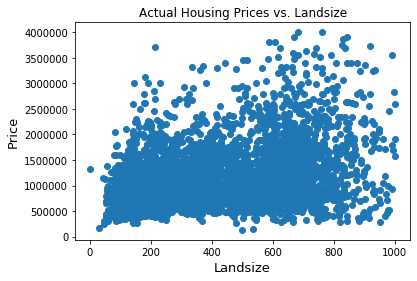

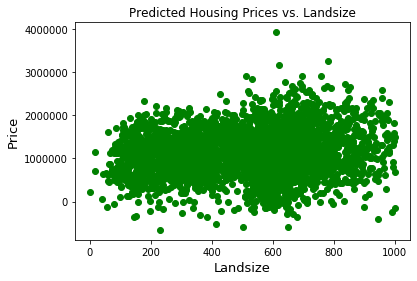

In [32]:
%matplotlib inline
plt.figure(1)
plt.scatter(train['Landsize'],train['Price'])
plt.xlabel('Landsize', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.title("Actual Housing Prices vs. Landsize")
    
plt.figure(2)
plt.scatter(test['Landsize'],predictions,color='green')
plt.xlabel('Landsize', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.title("Predicted Housing Prices vs. Landsize")